In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler,QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

In [2]:
housing = pd.read_csv("train.csv")


In [3]:
housing.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
numeric_df = housing.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()
correlation_matrix['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

## Keeping necessary Column


In [5]:
req_tr = ["GarageArea","OverallQual","TotalBsmtSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","SalePrice"]


In [6]:
selected_tr = housing[req_tr]


In [7]:
selected_tr.loc[:, 'TotalBath'] = (selected_tr['BsmtFullBath'].fillna(0) + 
                                    selected_tr['BsmtHalfBath'].fillna(0) + 
                                    selected_tr['FullBath'].fillna(0) + 
                                    selected_tr['HalfBath'].fillna(0))

selected_tr.loc[:, 'TotalSF'] = (selected_tr['TotalBsmtSF'].fillna(0) +  
                                  selected_tr['GrLivArea'].fillna(0))

C:\Users\sucha\AppData\Local\Temp\ipykernel_10564\3560100544.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_tr.loc[:, 'TotalBath'] = (selected_tr['BsmtFullBath'].fillna(0) +
C:\Users\sucha\AppData\Local\Temp\ipykernel_10564\3560100544.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_tr.loc[:, 'TotalSF'] = (selected_tr['TotalBsmtSF'].fillna(0) +


In [8]:
selected_tr



,GarageArea,OverallQual,TotalBsmtSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,SalePrice,TotalBath,TotalSF
0,548,7,856,1710,1,0,2,1,208500,4,2566
1,460,6,1262,1262,0,1,2,0,181500,3,2524
2,608,7,920,1786,1,0,2,1,223500,4,2706
3,642,7,756,1717,1,0,1,0,140000,2,2473
4,836,8,1145,2198,1,0,2,1,250000,4,3343
...,...,...,...,...,...,...,...,...,...,...,...
1455,460,6,953,1647,0,0,2,1,175000,3,2600
1456,500,6,1542,2073,1,0,2,0,210000,3,3615
1457,252,7,1152,2340,0,0,2,0,266500,2,3492
1458,240,5,1078,1078,1,0,1,0,142125,2,2156


In [9]:
housing = selected_tr[['TotalBath','GarageArea','TotalSF','OverallQual','SalePrice']]


In [10]:
housing

,TotalBath,GarageArea,TotalSF,OverallQual,SalePrice
0,4,548,2566,7,208500
1,3,460,2524,6,181500
2,4,608,2706,7,223500
3,2,642,2473,7,140000
4,4,836,3343,8,250000
...,...,...,...,...,...
1455,3,460,2600,6,175000
1456,3,500,3615,6,210000
1457,2,252,3492,7,266500
1458,2,240,2156,5,142125


## Splitting the dataset and Creating Pipeline


In [11]:
from sklearn.model_selection import train_test_split
train_set,test_set =train_test_split(housing,test_size = 0.2,random_state = 42)
print(f"Rows in train set: {len(train_set)}\nRows in test set:{len(test_set)}\n")

Rows in train set: 1168
Rows in test set:292



In [12]:
train = train_set.drop("SalePrice",axis=1)
train_labels = train_set["SalePrice"].copy()

In [13]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler())
])


In [14]:
X_train = my_pipeline.fit_transform(train)


In [15]:
X_train



array([[-0.48377079, -0.86383727,  0.04719046, -0.82044456],
       [ 0.61127627, -0.45626397, -0.26638311, -0.08893368],
       [-1.57881784, -2.25716927, -1.21196543, -0.82044456],
       ...,
       [-0.48377079,  0.45366713, -1.04667083, -0.82044456],
       [-0.48377079, -1.23349678, -0.30527596,  0.64257719],
       [-0.48377079,  0.87071888,  0.41181089,  0.64257719]])

In [16]:
Y_train = train_labels
Y_train.shape



(1168,)

## Correlations


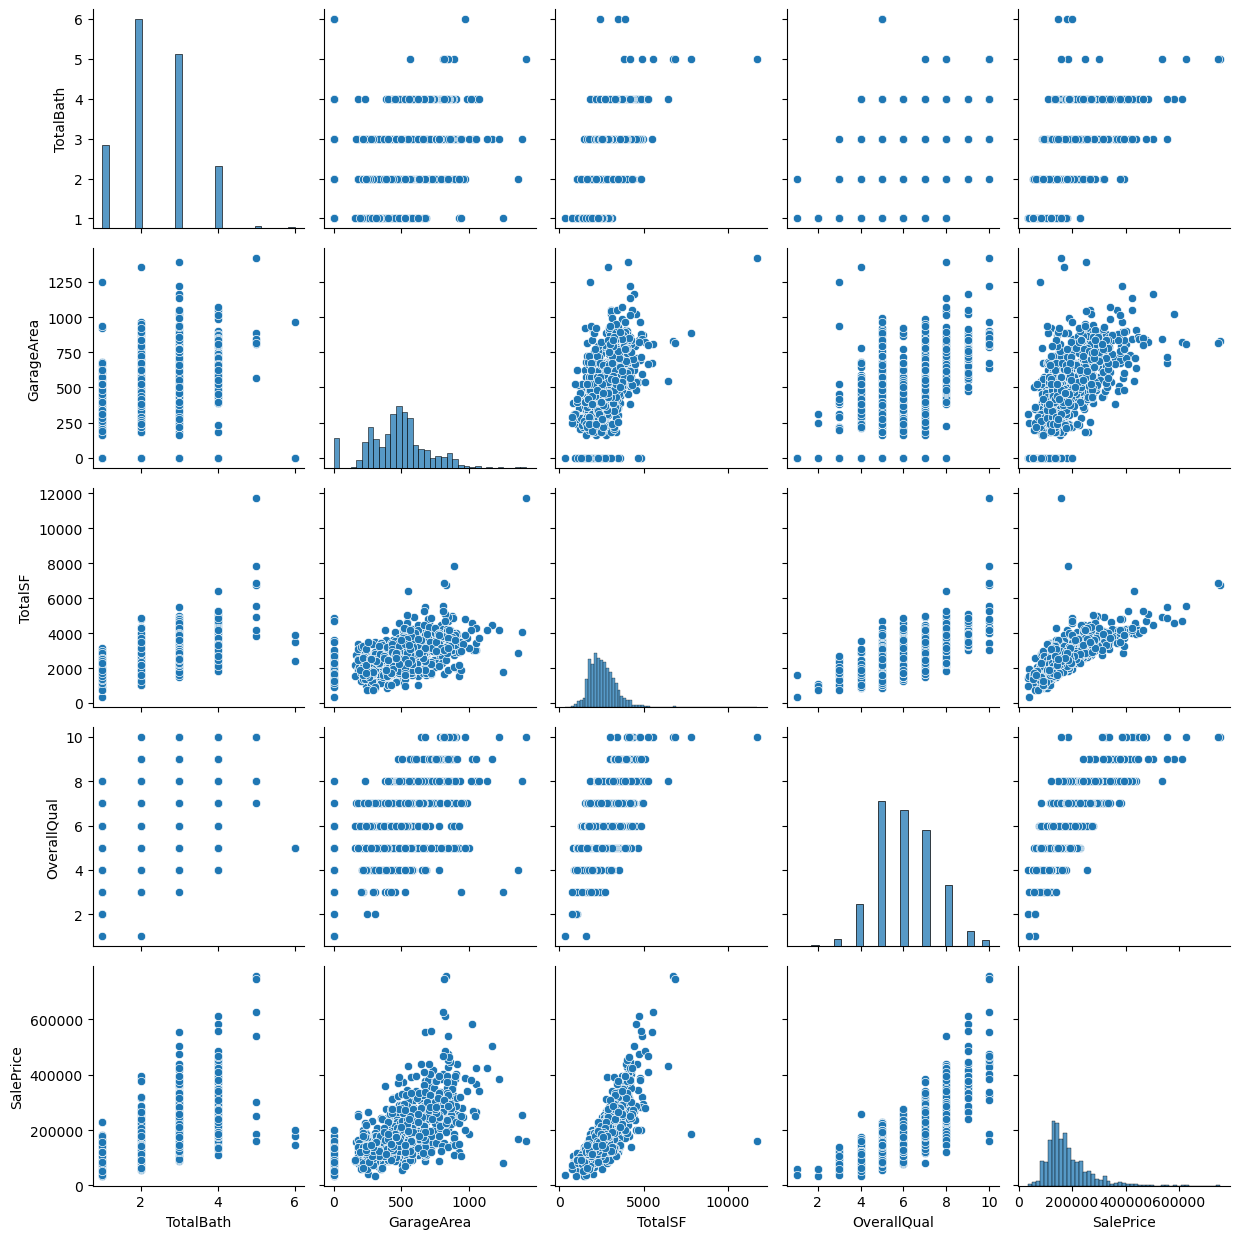

In [17]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
%matplotlib inline
sns.pairplot(housing)
plt.tight_layout()
plt.show()

In [18]:
corr_matrix = housing.corr()
corr_matrix['SalePrice'].sort_values(ascending = False)

SalePrice      1.000000
OverallQual    0.790982
TotalSF        0.778959
GarageArea     0.623431
TotalBath      0.613005
Name: SalePrice, dtype: float64

## Working with Test Dataframe


In [19]:
testdf = pd.read_csv("test.csv")


In [20]:
testdf

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [21]:
req_tst = ["GarageArea","OverallQual","TotalBsmtSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath"]


In [22]:
selected_tst = testdf[req_tst]


In [23]:
selected_tst.loc[:, 'TotalBath'] = (selected_tst['BsmtFullBath'].fillna(0) + 
                                    selected_tst['BsmtHalfBath'].fillna(0) + 
                                    selected_tst['FullBath'].fillna(0) + 
                                    selected_tst['HalfBath'].fillna(0))

selected_tst.loc[:, 'TotalSF'] = (selected_tst['TotalBsmtSF'].fillna(0) +  
                                  selected_tst['GrLivArea'].fillna(0))

C:\Users\sucha\AppData\Local\Temp\ipykernel_10564\2769775369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_tst.loc[:, 'TotalBath'] = (selected_tst['BsmtFullBath'].fillna(0) +
C:\Users\sucha\AppData\Local\Temp\ipykernel_10564\2769775369.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_tst.loc[:, 'TotalSF'] = (selected_tst['TotalBsmtSF'].fillna(0) +


In [24]:
selected_tst


,GarageArea,OverallQual,TotalBsmtSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,TotalBath,TotalSF
0,730.0,5,882.0,896,0.0,0.0,1,0,1.0,1778.0
1,312.0,6,1329.0,1329,0.0,0.0,1,1,2.0,2658.0
2,482.0,5,928.0,1629,0.0,0.0,2,1,3.0,2557.0
3,470.0,6,926.0,1604,0.0,0.0,2,1,3.0,2530.0
4,506.0,8,1280.0,1280,0.0,0.0,2,0,2.0,2560.0
...,...,...,...,...,...,...,...,...,...,...
1454,0.0,4,546.0,1092,0.0,0.0,1,1,2.0,1638.0
1455,286.0,4,546.0,1092,0.0,0.0,1,1,2.0,1638.0
1456,576.0,5,1224.0,1224,1.0,0.0,1,0,2.0,2448.0
1457,0.0,5,912.0,970,0.0,1.0,1,0,2.0,1882.0


In [25]:
test_df_unproc = selected_tst[['TotalBath','GarageArea','TotalSF','OverallQual']]


In [26]:
test_df_unproc


,TotalBath,GarageArea,TotalSF,OverallQual
0,1.0,730.0,1778.0,5
1,2.0,312.0,2658.0,6
2,3.0,482.0,2557.0,5
3,3.0,470.0,2530.0,6
4,2.0,506.0,2560.0,8
...,...,...,...,...
1454,2.0,0.0,1638.0,4
1455,2.0,286.0,1638.0,4
1456,2.0,576.0,2448.0,5
1457,2.0,0.0,1882.0,5


In [27]:
test_df = test_df_unproc.fillna(test_df_unproc.mean())


In [28]:
x_test = my_pipeline.transform(test_df[['TotalBath','GarageArea','TotalSF','OverallQual']].values)


In [29]:
x_test


array([[-1.57881784,  1.2024646 , -0.98590076, -0.82044456],
       [-0.48377079, -0.77853123,  0.0836525 , -0.08893368],
       [ 0.61127627,  0.02713693, -0.03910304, -0.82044456],
       ...,
       [-0.48377079,  0.47262403, -0.1715818 , -0.82044456],
       [-0.48377079, -2.25716927, -0.85949901, -0.82044456],
       [ 0.61127627,  0.82332664,  0.49445818,  0.64257719]])

## Model Selection


In [30]:
model = RandomForestRegressor()
model.fit(X_train,Y_train)

RandomForestRegressor()

In [31]:
y_train_pred = model.predict(X_train)
y_train_pred[:5]


array([151070.  , 170635.  ,  87582.5 , 161554.37, 140058.  ])

In [32]:
some_data = train.iloc[:5]
some_labels = train_labels.iloc[:5]

In [33]:
proc_data = my_pipeline.transform(some_data)
model.predict(proc_data)


array([151070.  , 170635.  ,  87582.5 , 161554.37, 140058.  ])

In [34]:
list(some_labels)


[145000, 178000, 85000, 175000, 127000]

In [35]:
train_mse = mean_squared_error(Y_train,y_train_pred)


In [36]:
train_rmse = np.sqrt(train_mse)


In [37]:
print(f"Training MSE: {train_mse:.2f}, Training RMSE: {train_rmse:.2f}")


Training MSE: 164871266.74, Training RMSE: 12840.22


## Cross - Validation


In [38]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,X_train,Y_train,scoring="neg_mean_squared_error",cv = 20)
rmse_scores = np.sqrt(-scores)

In [39]:
rmse_scores


array([26653.01014165, 24211.53006647, 48582.31722763, 25781.95837673,
       35450.72748962, 31280.33171858, 70019.69994662, 39491.9355964 ,
       43355.07602062, 34078.04748082, 36468.04440154, 28560.09453264,
       26651.01595761, 32208.00364011, 28989.83042663, 26297.82023319,
       37571.45038399, 28333.8094005 , 21459.29016154, 31432.88581599])

In [40]:
def print_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard Deviation",scores.std())

In [41]:
print_scores(rmse_scores)

Scores: [26653.01014165 24211.53006647 48582.31722763 25781.95837673
 35450.72748962 31280.33171858 70019.69994662 39491.9355964
 43355.07602062 34078.04748082 36468.04440154 28560.09453264
 26651.01595761 32208.00364011 28989.83042663 26297.82023319
 37571.45038399 28333.8094005  21459.29016154 31432.88581599]
Mean: 33843.84395094429
Standard Deviation 10583.331789353335


In [42]:
y_pred=model.predict(x_test)

In [43]:
y_pred


array([128859.  , 150035.  , 157320.37, ..., 151208.  , 101527.  ,
       232573.96])

In [44]:
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)